<div style="font-size:18pt; padding-top:20px; text-align:center">СЕМИНАР 17. <b>Кластеризация текстовых документов и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Загрузка исходных данных</a></li>
        <li><a href="#2">K-means</a></li>
        <li><a href="#3">Latent Semantic Analisys (LSA)</a>
        <li><a href="#4">Latent Dirichlet Allocation (LDA)</a>
        <li><a href="#5">Источники</a>
        </li>
    </ol>
</div>

In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation

from sklearn import metrics

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.preprocessing import Normalizer

In [4]:
from sklearn.datasets import fetch_20newsgroups

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Загрузка исходных данных</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Исходные данные</b></p>

In [5]:
newsgroups_train = fetch_20newsgroups(subset="train")#естьall,train,test

In [6]:
newsgroups_train["data"][:1]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"]

In [7]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [8]:
x = newsgroups_train.data
y = newsgroups_train.target
y

array([7, 4, 4, ..., 3, 1, 8])

In [9]:
len(x)

11314

In [10]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

<p><b>Предобработка</b></p>

<p>CountVectorizer</p>

In [11]:
tf_vectorizer = CountVectorizer(max_df=0.90, min_df=10, max_features=1000, stop_words="english") #типо рекомендует LDA 
#max_df - оставляет столько долей частовстречающихся слов, ипо если больше 0,9 частовстречаемость - то вон их
#min_df - отбрасывает редковстречающихся слов (меньше 10 раз)
#Count просто считает, а TFIDF как-то по умному (маша) 

In [12]:
x_tf = tf_vectorizer.fit_transform(x)

In [13]:
x_tf[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [14]:
x_tf.shape

(11314, 1000)

In [15]:
words = tf_vectorizer.get_feature_names()
words

['00',
 '000',
 '01',
 '02',
 '03',
 '04',
 '0d',
 '0t',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '145',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1992',
 '1993',
 '1993apr15',
 '1d9',
 '1t',
 '20',
 '200',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '2tm',
 '30',
 '31',
 '32',
 '33',
 '34',
 '34u',
 '35',
 '36',
 '37',
 '38',
 '39',
 '3d',
 '3t',
 '40',
 '408',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '48',
 '49',
 '50',
 '500',
 '51',
 '55',
 '60',
 '6ei',
 '70',
 '75',
 '75u',
 '80',
 '800',
 '90',
 '91',
 '92',
 '93',
 '__',
 '___',
 'a86',
 'able',
 'ac',
 'accept',
 'access',
 'according',
 'acs',
 'act',
 'action',
 'actually',
 'add',
 'address',
 'administration',
 'advance',
 'advice',
 'ago',
 'agree',
 'ah',
 'ai',
 'air',
 'al',
 'algorithm',
 'allow',
 'alt',
 'america',
 'american',
 'andrew',
 'anonymous',
 'answer',
 'answers',
 'anti',
 'anybody',
 'appears',
 'apple',
 'application',
 'applications',
 'appreciated',
 'apr',
 'april',
 'arab',
 'ar

<p>TfidfVectorizer</p>

In [16]:
vectorizer = TfidfVectorizer(max_df=0.9, max_features=1000, min_df=4, stop_words="english",
                             use_idf=True)

x_tfidf = vectorizer.fit_transform(x)

In [17]:
x_tfidf.max()

0.99834906995235795

In [18]:
x_tfidf.sum(axis=1) #показать что это не вероятность (в сумме не дает 1)

matrix([[ 4.06543659],
        [ 4.05475677],
        [ 7.51576825],
        ..., 
        [ 3.99597395],
        [ 4.78817207],
        [ 4.33007559]])

In [19]:
np.sum(x_tfidf, axis=0).shape

(1, 1000)

In [20]:
x_tfidf.sum(axis=1).shape

(11314, 1)

In [21]:
x_tfidf[:5].toarray()

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.12066263,
         0.        ,  0.        ]])

In [22]:
x_tfidf.shape

(11314, 1000)

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. K-means</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [23]:
km = KMeans(n_clusters=10, init="k-means++", max_iter=50, n_init=5, verbose=True)
#n_init - количество повторений, Инерция чтобы центр кластера был ближе к точкам

In [24]:
km.fit(x_tfidf)

Initialization complete
Iteration  0, inertia 19484.001
Iteration  1, inertia 10483.381
Iteration  2, inertia 10380.166
Iteration  3, inertia 10343.728
Iteration  4, inertia 10332.943
Iteration  5, inertia 10329.077
Iteration  6, inertia 10325.843
Iteration  7, inertia 10324.283
Iteration  8, inertia 10323.112
Iteration  9, inertia 10321.147
Iteration 10, inertia 10319.536
Iteration 11, inertia 10319.321
Iteration 12, inertia 10319.241
Iteration 13, inertia 10319.222
Iteration 14, inertia 10319.218
Iteration 15, inertia 10319.212
Iteration 16, inertia 10319.210
Iteration 17, inertia 10319.207
Iteration 18, inertia 10319.206
Converged at iteration 18: center shift 0.000000e+00 within tolerance 9.527952e-08
Initialization complete
Iteration  0, inertia 19256.166
Iteration  1, inertia 10449.841
Iteration  2, inertia 10371.946
Iteration  3, inertia 10351.937
Iteration  4, inertia 10341.720
Iteration  5, inertia 10331.212
Iteration  6, inertia 10324.122
Iteration  7, inertia 10320.789
Itera

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=10, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=True)

In [25]:
km.labels_.shape

(11314,)

In [26]:
km.cluster_centers_.shape

(10, 1000)

In [27]:
km.inertia_

10297.822499780208

<p>Подбор количества кластеров</p>

In [28]:
#наилучшее число кластеров - ?

In [30]:
inercia = []
sil = []
for i in range(3, 20):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=10, n_init=1, verbose=False)
    km.fit(x_tfidf)
    inercia.append(km.inertia_)
    s = metrics.silhouette_score(x_tfidf, km.labels_)
    sil.append(s) #метрика силуэтта качества кластеризации

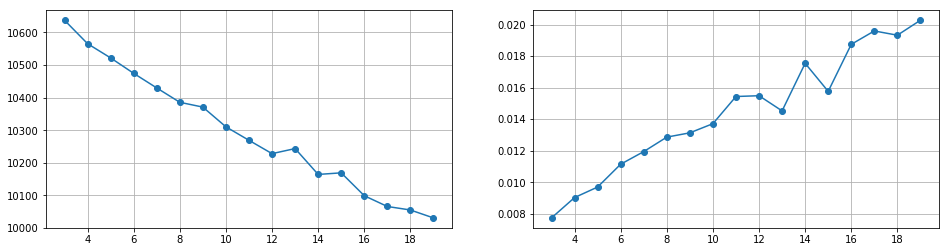

In [31]:
plt.figure(1, figsize=[16,4])

plt.subplot(1,2,1)
plt.plot(range(3,20), inercia, "-o")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(range(3,20), sil, "-o")
plt.grid(True)

<p>Top 20 слов для каждого кластера</p>

In [32]:
# TODO

<a name="3"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">3. Latent Semantic Analisys (LSA)</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [33]:
svd = TruncatedSVD(10)

In [34]:
normalizer = Normalizer(copy=False)

In [35]:
svd.fit_transform(x_tfidf).shape

(11314, 10)

In [37]:
#http://scikit-learn.org/stable/auto_examples/text/document_clustering.html

<a name="4"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">4. Latent Dirichlet Allocation (LDA)</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [38]:
lda = LatentDirichletAllocation(n_topics=10, max_iter=5, learning_method="online", 
                                learning_offset=50., random_state=0)

In [39]:
lda.fit(x_tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_jobs=1, n_topics=10, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [40]:
lda.components_

array([[  8.99527186e+00,   6.34289002e+00,   1.23891029e-01, ...,
          2.73646073e+01,   1.28508567e-01,   1.22610421e-01],
       [  1.00270524e-01,   9.51672618e+01,   1.00252454e-01, ...,
          1.03437939e+02,   5.22743494e+01,   1.01684883e-01],
       [  1.45924129e+03,   3.56826232e+02,   3.37939807e+02, ...,
          4.65895570e-01,   5.53707738e+01,   4.38565408e+01],
       ..., 
       [  1.00348302e-01,   4.78768163e+02,   1.00045317e-01, ...,
          1.01370199e+02,   1.52779316e+02,   1.92572353e+02],
       [  1.00126321e-01,   2.92752498e-01,   1.00357762e-01, ...,
          3.60495936e+01,   1.54830637e+02,   1.32988117e+02],
       [  1.00215708e-01,   3.10211052e-01,   1.49714614e-01, ...,
          3.13467518e+01,   7.47965949e+01,   4.33815145e+01]])

In [41]:
lda.components_.shape

(10, 1000)

In [42]:
lda.components_[0]

array([  8.99527186e+00,   6.34289002e+00,   1.23891029e-01,
         1.70098037e-01,   1.04779283e-01,   1.13538327e-01,
         1.00050536e-01,   1.00023336e-01,   1.45116400e+02,
         8.79917017e+01,   5.41517611e+01,   3.00572497e+01,
         2.67859520e+01,   2.01194545e+01,   1.00901619e-01,
         7.38783421e+01,   4.62042679e+01,   9.44979978e+01,
         1.12015090e+01,   3.26819272e+01,   1.83015940e-01,
         1.26312254e+01,   1.90391154e-01,   1.00019564e-01,
         1.00018446e-01,   3.50781383e+01,   3.06915272e+01,
         4.90103591e+01,   3.20709375e+01,   4.54983423e+01,
         1.84601104e+01,   6.08854815e+01,   3.44032383e+01,
         1.42339245e+00,   1.06808618e+01,   3.51844971e+01,
         1.00015195e-01,   1.07043603e+02,   7.35485246e+00,
         2.14553626e+01,   6.13689504e+00,   2.46320500e+01,
         1.00017861e-01,   3.45811082e+01,   1.44734924e+01,
         1.12460519e+01,   5.66559295e+00,   1.57888338e+00,
         1.02202398e-01,

In [43]:
lda.n_batch_iter_

446

In [44]:
lda.n_iter_

5

In [46]:
#http://qwone.com/~jason/20Newsgroups/
#http://scikit-learn.org/stable/datasets/twenty_newsgroups.html

In [47]:
#http://scikit-learn.org/stable/auto_examples/text/document_clustering.html
#http://scikit-learn.org/stable/auto_examples/applications/topics_extraction_with_nmf_lda.html
#http://scikit-learn.org/stable/modules/decomposition.html